# Medical Costs : How your profile affects your medical charges?


Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

### Columns

   - age: age of primary beneficiary

   - sex: insurance contractor gender, female, male

   - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   - children: Number of children covered by health insurance / Number of dependents

   - smoker: Smoking

   - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   - charges: Individual medical costs billed by health insurance


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/shailesh/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load the data

In [7]:
data = pd.read_csv("insurance.csv")

### 1. Exploratory Data Analysis

In [8]:
head = data.head(5)
print(head)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [9]:
describe = data.describe()
print(describe)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


The average insurance premium is at $13,270.

In [10]:
sex = data.groupby(by = 'sex').size()
print(sex)
smoker = data.groupby(by = 'smoker').size()
print(smoker)
region = data.groupby(by = 'region').size()
print(region)

sex
female    662
male      676
dtype: int64
smoker
no     1064
yes     274
dtype: int64
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


The data is very much balanced between gender and region. On the other hand, non-smokers outnumber the smokers.

#### 1.2 Examining the Relationship of Charges to the Categorical Features



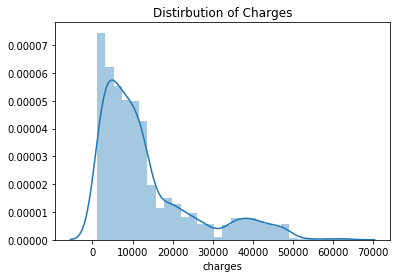

In [11]:
## check the distribution of charges
distPlot = sns.distplot(data['charges'])
plt.title("Distirbution of Charges")
plt.show(distPlot)


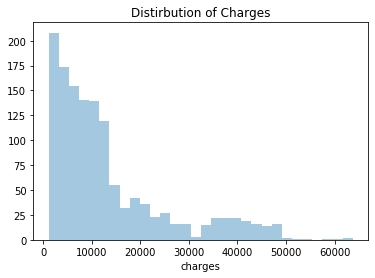

In [12]:
## check the distribution of charges
distPlot = sns.distplot(data['charges'], kde=False)
plt.title("Distirbution of Charges")
plt.show(distPlot)



The graph shows it is skewed to the right. We can tell visually that there may be outliers (the maximum charge is at $63,770). Let us examine again this time between the groups.


#### 1.3 Charges Between Gender


### Violin plot is used to see modal values

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
1387.1723338865468


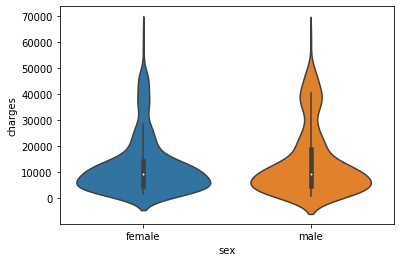

In [13]:
## check charges vs features
meanGender = data.groupby(by = "sex")["charges"].mean()
print(meanGender)
print(meanGender["male"] - meanGender["female"])
boxPlot1 = sns.violinplot(x = "sex", y = "charges", data = data)


In [14]:
#On avg what is the value of charge =13,270
# On avg,what is the value of charge,given user ==Male -x
### On an avg ,what is the value of charge,given user ==Female =Y



In [15]:
Means of 2 means == similar ,( We Use ANOVA )
h0
Ha

SyntaxError: invalid syntax (<ipython-input-15-6de095ea2376>, line 1)

In [16]:
data[data.sex== 'male'].mean()

age            38.917160
bmi            30.943129
children        1.115385
charges     13956.751178
dtype: float64

In [17]:
data[data.sex== 'female'].mean()

age            39.503021
bmi            30.377749
children        1.074018
charges     12569.578844
dtype: float64

In [18]:
data[data.sex== 'female'].std()

age            14.054223
bmi             6.046023
children        1.192115
charges     11128.703801
dtype: float64

In [19]:
data[data.sex== 'male'].std()

age            14.050141
bmi             6.140435
children        1.218986
charges     12971.025915
dtype: float64



There is not much difference between gender based on the violin plot. For males, the average charge is "slightly" higher compared to female counterparts with the difference of around $1387.


#### 1.4 Charges between Smokers and non-Smokers

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
23615.96353367665


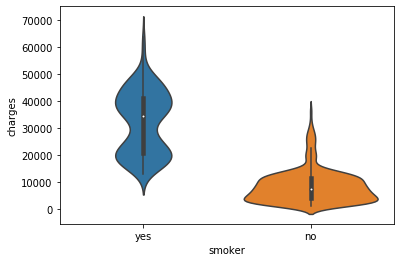

In [20]:
meanSmoker = data.groupby(by = "smoker")["charges"].mean()
print(meanSmoker)
print(meanSmoker["yes"] - meanSmoker["no"])
boxPlot2 = sns.violinplot(x = "smoker", y = "charges", data = data)




Ok, so there's around $23,615 difference between smokers and non-smokers. Smoking is very expensive indeed.


#### 1.5 Charges Among Regions

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


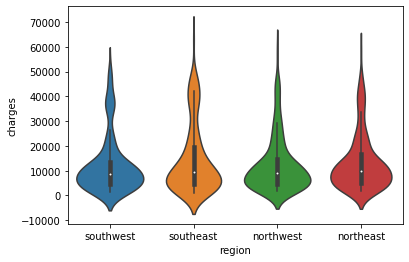

In [21]:
meanRegion = data.groupby(by = "region")["charges"].mean()
print(meanRegion)
boxPlot3 = sns.violinplot(x = "region", y = "charges", data = data)


As with the gender, region groups also does not show much difference between them based on the plot. Even so, the individuals from the Southeast has charged more on there bills. The highest charged individual also lives in the region as shown in the chart.

#### 1.6 In Relation to Other Features



The following shows the relationship of the medical charges to other numerical variables.



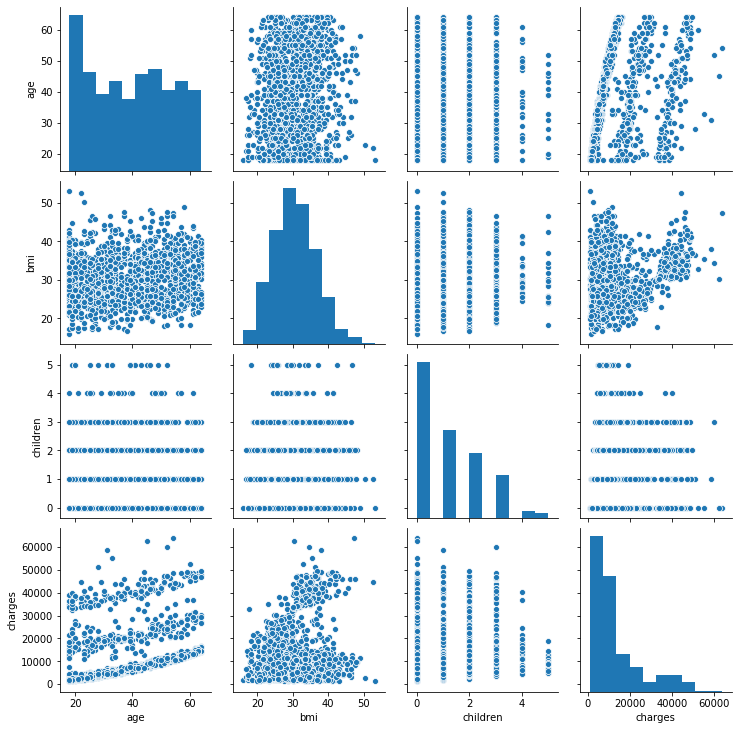

In [22]:
pairPlot = sns.pairplot(data)



Let us focus on the following relationships (first 3 charts in the bottom row):

  - charges vs age - it is apparent the that charges are higher to older individuals.
  
  - charges vs bmi - BMIs greater than 30 is considered obesed. The chart shows a group of individuals with BMI > 30 are charged higher
  - charges vs no children - those who has more children tends to have been charged lower than those who don't have.



#### 1.7 Smokers vs Non- Smokers

Based on the violin plot we have noticed a big difference in charges between the smokers and non-smokers. Let us look further on this relationship complemented with other numerical variables.

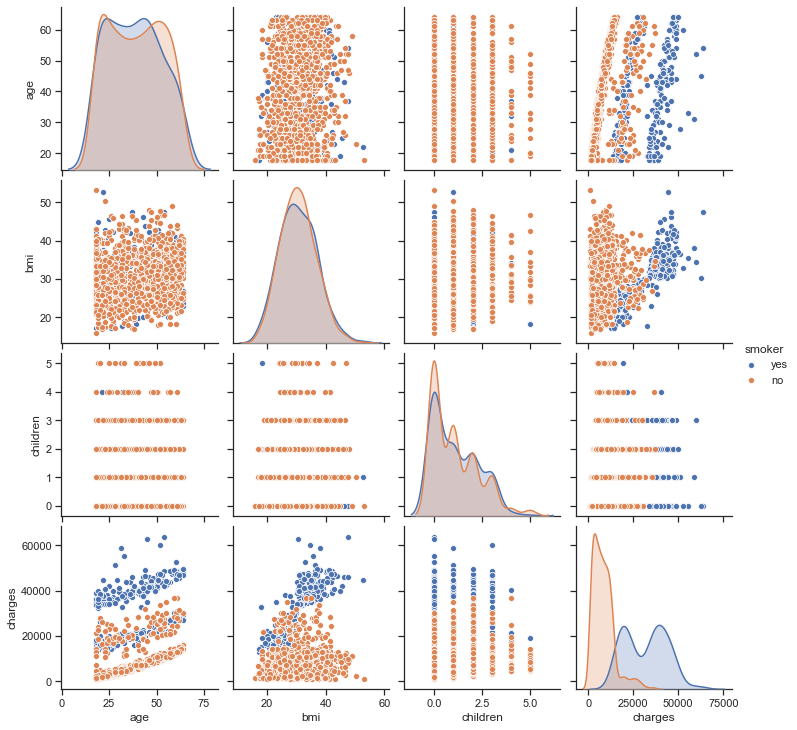

In [23]:
sns.set(style = "ticks")
smokerPairs = sns.pairplot(data, hue = "smoker")




Focusing again on the first 3 charts in the bottom row, we can say that the higher amount of charges are dominated by blue points which are represented by smokers.


### 2. Pre-Processing the Data

In [24]:
## Dummify sex, smoker and region
scaleMinMax = MinMaxScaler()
data[["age", "bmi", "children"]] = scaleMinMax.fit_transform(data[["age", "bmi", "children"]])
data = pd.get_dummies(data, prefix = ["sex", "smoker", "region"])
## retain sex = male, smoker = yes, and remove 1 region = northeast to avoid dummytrap
data = data.drop(data.columns[[4,6,11]], axis = 1)
head = data.head()
print(head)


        age       bmi  children      charges  sex_male  smoker_yes  \
0  0.021739  0.321227       0.0  16884.92400         0           1   
1  0.000000  0.479150       0.2   1725.55230         1           0   
2  0.217391  0.458434       0.6   4449.46200         1           0   
3  0.326087  0.181464       0.0  21984.47061         1           0   
4  0.304348  0.347592       0.0   3866.85520         1           0   

   region_northeast  region_northwest  region_southeast  
0                 0                 0                 0  
1                 0                 0                 1  
2                 0                 0                 1  
3                 0                 1                 0  
4                 0                 1                 0  


### 3. Quantifying the effect of the features to the medical charges

We have already visualized the relationship of the variables to the charges. Now we will further investigate by looking at the relationships using multiple linear regression. Remember that the aim of this section is to quantify the relationship and not to create the prediction model. Let us first create a training and testing data set to proceed.

Based on the visualization, we can make a couple of hypothesis about the relationship.


   - There is no real difference in charges between gender or regions.
    
   - The charge for smokers are very much higher than the non-smokers.
    
   - The charge gets higher as the individual gets older.
    
   - The charge gers higher as the individual reaches over 30BMI.
    
   - Lastly, the charge is higher for those who have fewer number of children.


In [25]:
dataX = data.drop(data.columns[[3]], axis = 1)
dataY = data.iloc[:, 3]
X_train, x_test, Y_train, y_test = train_test_split(dataX, dataY, random_state = 0)


In [26]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
linearModel = sm.OLS(Y_train, X_train2)
linear = linearModel.fit()
print(linear.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     343.0
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.08e-279
Time:                        21:14:46   Log-Likelihood:                -10176.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     994   BIC:                         2.041e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2585.6935    702.669  



So we have generated a linear model. Let us see how our initial hypothesis fared with the actual result.

   - There is no real difference in charges between gender or regions.
   - Result: The p-value is 0.973 indicating there is no statistical difference between the gender or region group.
   - The charge for smokers are very much higher than the non-smokers.
   - Result: The p-value is 0.000 which indicates that there is a difference between the group.
   - The charge gets higher as the individual gets older.</b> Result: The p-value is 0.000 which indicates that the charge is higher as the individual gets older.
   - The charge gers higher as the BMI gets higher.
   - Result: The p-values is 0.000 which indicates that the charge is higher as the BMI gets higher.
   - Lastly, there is significant decrease in charges as the number of children increases.
   - Result: The p-value is 0.007. Interestingly, the coefficient is 2,211 which means that the charge gets higher as the individual has more number of childre. The initial hypothesis is incorrect. This is essentially the reason why we can't solely rely on visualization in generating conclusions.




### 4. Basic Machine Learning: Comparison Between Selected Regression Models




In this section, we will create regression models and try to compare there robustness given the data. The models considered are Linear Regression, Ridge, LASSO, and ElasticNet.





This is basically what the following code does line-by-line:

1. import the library for the model
2. call the model
3. fit the model
4. predict the model using the test data
5. get the mean squared error
6. calculate the root mean square error
7. get the R-squared value



In [27]:
## try Linear Regression ##
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linear = linearModel.fit(X_train, Y_train)
linearPred = linear.predict(x_test)
mseLinear = metrics.mean_squared_error(y_test, linearPred)
rmseLinear = mseLinear**(1/2)

In [28]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge()
ridge = ridgeModel.fit(X_train, Y_train)
ridgePred = ridge.predict(x_test)
mseRidge = metrics.mean_squared_error(y_test, ridgePred)
rmseRidge = mseRidge**(1/2)


In [29]:
from sklearn.linear_model import Lasso
lassoModel = Lasso()
lasso = lassoModel.fit(X_train, Y_train)
lassoPred = lasso.predict(x_test)
mseLasso = metrics.mean_squared_error(y_test, lassoPred)
rmseLasso = mseLasso**(1/2)


In [30]:
from sklearn.linear_model import ElasticNet
elasticNetModel = ElasticNet(alpha = 0.01, l1_ratio = 0.9, max_iter = 20)
ElasticNet = elasticNetModel.fit(X_train, Y_train)
ElasticNetPred = ElasticNet.predict(x_test)
mseElasticNet = metrics.mean_squared_error(y_test, ElasticNetPred)
rmseElasticNet = mseElasticNet**(1/2)



4.1 Comparing the Models¶


In [32]:
performanceData = pd.DataFrame({"model":["linear", "lasso", "ridge", "elasticnet"], "rmse":[rmseLinear, rmseLasso, rmseRidge, rmseElasticNet]})
(performanceData)


,model,rmse
0,linear,5668.840026
1,lasso,5669.249938
2,ridge,5677.405619
3,elasticnet,5677.438579


Based on the table above, linear regression has a slight edge among the models considered having the least RMSE. This is not surprising as the other 3 models are known to be more robust when there are quite a number of features. We only have 8 this time.

### Conclusion

We have found out that region and gender does not bring significant difference on charges among its groups. Age, BMI, number of children and smoking are the once that drives the charges. The statistical relationship between number of children and charges is surprisingly different from our visualization. Meanwhile, linear regression has edged the regularized regression models in giving the best prediction. This proves that regularized regression models are not guaranteed to be superior to linear regressions.